# Plotting the qcinv values for g,r,i,z DECAT Images
by Melissa Graham, 2022-04-23

This notebook plots the qcinv values for DECAT images.

Feel free to add to this notebook, DECAT people.

Notes:
 * psf, sky, cloud, and teff often fail for the DECaPS fields
 * only using exposures in g, r, i, or z filter for this

Stretch goals:
 * plot qcinv values vs. moon distance and illumination
 * include filters beyond griz
 * compile nightly image statistics?
 * make the RA/Dec plot a heat map of the sky


## 0. Imports and Definitions

In [1]:
import glob,os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import astropy
from astropy.time import Time

Last verified to run with:
 * numpy, 1.13.3
 * matplotlib, 3.0.0
 * astropy, 3.0.4

In [2]:
print(np.__version__)
print(matplotlib.__version__)
print(astropy.__version__)

1.13.3
3.0.0
3.0.4


## 1. Read the .qcinv files

Get the list of all the qcinv files to date.

In [3]:
temp1 = glob.glob( '../*/*/*.qcinv')
temp2 = np.asarray( temp1, dtype='str' )
qcinv_fnms = np.sort( temp2 )
del temp1, temp2

print('most recent qcinv file included is:')
print( qcinv_fnms[-1])

most recent qcinv file included is:
../2022A/20220523/20220523.qcinv


For qcinv files, have to read the full line and then chop it up.

These files are really annoying, with their inconsistent columns, missing data as whitespace.

Toss out anything not in filters g, r, i, z. (Filters more than one character throw off the column spacing).

**This is a total hack job.**

In [4]:
temp_a = []
temp_b = []
temp_c = []
temp_d = []
temp_e = []
temp_f = []
temp_g = []
temp_h = []
temp_i = []
temp_j = []
temp_k = []
temp_l = []

temp_1 = []

for q,qfnm in enumerate(qcinv_fnms):
        
    t1 = qfnm.split('/')[3]
    t2 = t1.split('.')[0]
    sdate = t2[0:4]+'-'+t2[4:6]+'-'+t2[6:8]
    plus_a_day = 0.0
    newutday = False
    del t1,t2

    f = open(qfnm)
    lines = f.readlines()
    for l,line in enumerate(lines):
       
        if (line[0:1] != '#') & (line[0:1] != 'M'):

            okfilter = False
            if line[0:1] == '9':
                temp = line[24:28]
            elif line[0:1] == '1':
                temp = line[25:29]
            if (temp.strip() == 'g') | (temp.strip() == 'r') | \
            (temp.strip() == 'i') | (temp.strip() == 'z'):
                okfilter = True

            if (line[0:1] == '9') & (okfilter == True):

                utc = line[19:24]
                if (utc[0:1] == '0') & (newutday == False):
                    plus_a_day = 1.0
                    newutday = True

                temp_1.append( Time(sdate+'T'+utc+':00.00', format='isot', scale='utc').mjd + plus_a_day )
                del utc

                temp_a.append( line[1:6] )
                temp_b.append( line[6:12] )
                temp_c.append( line[12:18] )
                temp_d.append( line[19:24] )
                temp_e.append( line[24:28].strip() )
                temp_f.append( line[28:32] )
                temp_g.append( line[32:37] )
                if line[37:43] == '      ':
                    temp_h.append( 'NaN' )
                else:
                    temp_h.append( line[37:43] )
                if line[43:49] == '      ':
                    temp_i.append( 'NaN' )
                else:
                    temp_i.append( line[43:49] )
                if line[49:55] == '      ':
                    temp_j.append( 'NaN' )
                else:
                    temp_j.append( line[49:55] )
                if line[55:61] == '      ':
                    temp_k.append( 'NaN' )
                else:
                    temp_k.append( line[55:61] )
                temp_l.append( line[61:92] )
                
                if line[32:37] == '0 1.1':
                    print('secz = ','0 1.1')
                    
                
            elif (line[0:1] == '1') & (okfilter == True):
            
                utc = line[20:25]
                if (utc[0:1] == '0') & (newutday == False):
                    plus_a_day = 1.0
                    newutday = True

                temp_1.append( Time(sdate+'T'+utc+':00.00', format='isot', scale='utc').mjd + plus_a_day )
                del utc

                temp_a.append( line[1:7] )
                temp_b.append( line[7:13] )
                temp_c.append( line[13:19] )
                temp_d.append( line[20:25] )
                temp_e.append( line[25:29].strip() )
                temp_f.append( line[29:33] )
                temp_g.append( line[33:38] )
                if line[38:44] == '      ':
                    temp_h.append( 'NaN' )
                else:
                    temp_h.append( line[38:44] )
                if line[44:50] == '      ':
                    temp_i.append( 'NaN' )
                else:
                    temp_i.append( line[44:50] )
                if line[50:56] == '      ':
                    temp_j.append( 'NaN' )
                else:
                    temp_j.append( line[50:56] )
                if line[56:62] == '      ':
                    temp_k.append( 'NaN' )
                else:
                    temp_k.append( line[56:62] )
                temp_l.append( line[62:92] )
            
            del okfilter
            
    del newutday, plus_a_day
    
    f.close()
    del f, lines

qcinv_mjd    = np.asarray( temp_1, dtype='float' )
qcinv_expid  = np.asarray( temp_a, dtype='int' )
qcinv_ra     = np.asarray( temp_b, dtype='float' )
qcinv_dec    = np.asarray( temp_c, dtype='float' )
qcinv_ut     = np.asarray( temp_d, dtype='str' )
qcinv_fil    = np.asarray( temp_e, dtype='str' )
qcinv_time   = np.asarray( temp_f, dtype='float' )
qcinv_secz   = np.asarray( temp_g, dtype='float' )
qcinv_psf    = np.asarray( temp_h, dtype='float' )
qcinv_sky    = np.asarray( temp_i, dtype='float' )
qcinv_cloud  = np.asarray( temp_j, dtype='float' )
qcinv_teff   = np.asarray( temp_k, dtype='float' )
qcinv_Object = np.asarray( temp_l, dtype='str' )

del temp_1
del temp_a, temp_b, temp_c, temp_d
del temp_e, temp_f, temp_g, temp_h
del temp_i, temp_j, temp_k, temp_l

Quick check for how many exposures there are in our arrays.

In [5]:
print(len(qcinv_expid))

25136


Calculate hour of the night, from midnight, using the UT values.

Later this could be done better using ephem midnights but whatever.

In [6]:
qcinv_nhr = np.zeros( len(qcinv_ut), dtype='float' )
for i in range(len(qcinv_ut)):
    temp = qcinv_ut[i].split(':')
    temp2 = float(temp[0]) + float(temp[1])/60.0
    
    ### account for daylight savings, apr 4 to sep 5 2021
    utcoff = -4.0
    if (qcinv_mjd[i] > 59462) & (qcinv_mjd[i] < 59673):
        utcoff = -3.0

    if (temp2 > 18.0) & (temp2 <= 24.0):
        qcinv_nhr[i] = temp2 - 24.0 + utcoff
    else:
        qcinv_nhr[i] = temp2 + utcoff

    del temp,temp2,utcoff

## 2. Make Plots

### sky coverage of DECAT exposures

the DDFs are color blue, purple, green, orange

stretch goal: make this a heat map instead

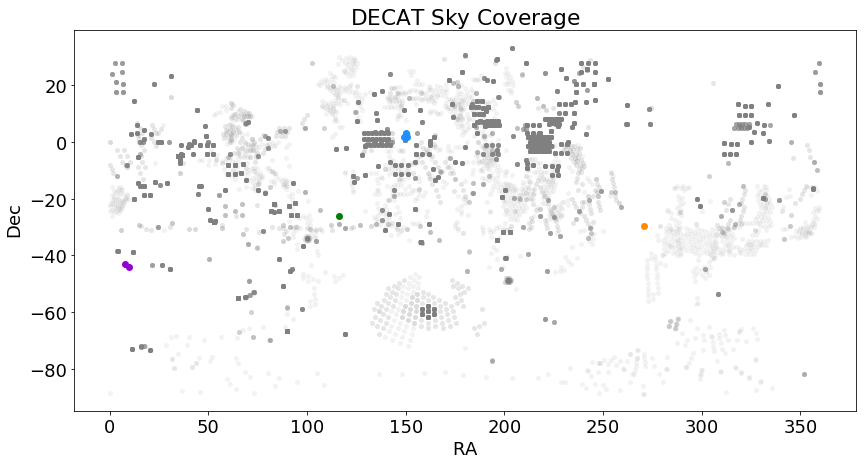

In [7]:
fig = plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size':18})

plt.plot( qcinv_ra, qcinv_dec, 'o', mew=0, ms=5, color='grey', alpha=0.1)

ddf_fname = np.asarray(['COSMOS-1','COSMOS-2','COSMOS-3','DECaPS-East',
                        'ELAIS-E1','ELAIS-E2','DECaPS-West'], dtype='str' )
ddf_ra = np.asarray([150.0, 149.22, 150.78, 270.89, 7.8746, 9.5, 116.32], dtype='float' )
ddf_dec = np.asarray([3.1, 1.75, 1.75, -29.53, -43.0096, -43.9980, -26.25], dtype='float' )
ddf_clr = np.asarray(['dodgerblue','dodgerblue','dodgerblue','darkorange',
                      'darkviolet','darkviolet','green'], dtype='str' )
for i in range(7):
    plt.plot( ddf_ra[i], ddf_dec[i], 'o', ms=7, mew=0, color=ddf_clr[i] )

# plt.xlim([,])
# plt.ylim([,])
plt.xlabel(r'${\rm RA}$',fontsize=18)
plt.ylabel(r'${\rm Dec}$',fontsize=18)
plt.title(r'${\rm DECAT\ Sky\ Coverage}$')
# plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.show()

### qcinv values

first get indices of exposures by filter

In [8]:
gx = np.where(qcinv_fil == 'g')[0]
rx = np.where(qcinv_fil == 'r')[0]
ix = np.where(qcinv_fil == 'i')[0]
zx = np.where(qcinv_fil == 'z')[0]
print(len(gx),len(rx),len(ix),len(zx))
print(np.unique(qcinv_fil))
filt_clrs = ['green','firebrick','goldenrod','slategrey']
filt_lbls = ['g','r','i','z']

6549 7534 7210 3843
['g' 'i' 'r' 'z']


distribution of exposure time

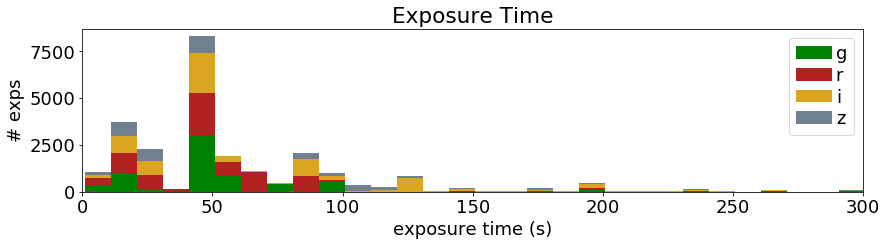

In [9]:
fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_time[gx],qcinv_time[rx],qcinv_time[ix],qcinv_time[zx]], \
         bins=60, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('exposure time (s)',fontsize=18)
plt.ylabel('# exps',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.xlim([0,300])
plt.title('Exposure Time')
plt.show()

distribution of time of night, since we've had more B-halves

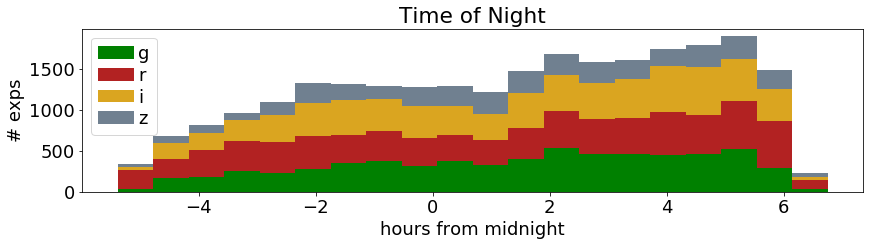

In [10]:
fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_nhr[gx],qcinv_nhr[rx],qcinv_nhr[ix],qcinv_nhr[zx]], \
         bins=20, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('# exps',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.title('Time of Night')
plt.show()

now for the qcinv values of secz, psf, sky, cloud, and teff

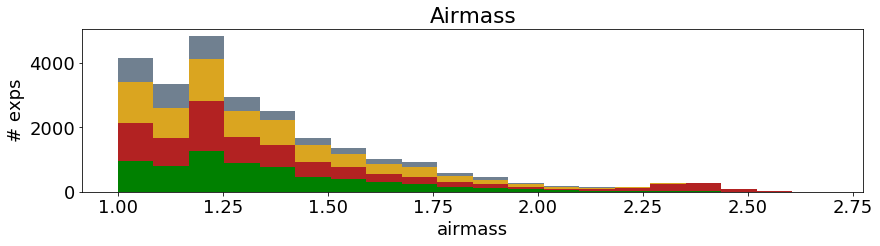

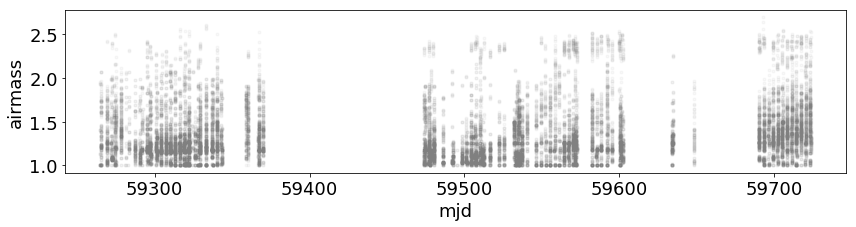

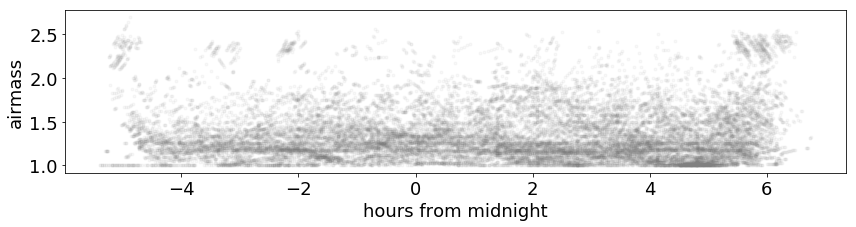

In [11]:
fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_secz[gx],qcinv_secz[rx],qcinv_secz[ix],qcinv_secz[zx]], \
         bins=20, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('airmass',fontsize=18)
plt.ylabel('# exps',fontsize=18)
plt.title('Airmass')
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_mjd, qcinv_secz, 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('mjd',fontsize=18)
plt.ylabel('airmass',fontsize=18)
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_nhr, qcinv_secz, 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('airmass',fontsize=18)
plt.show()

/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


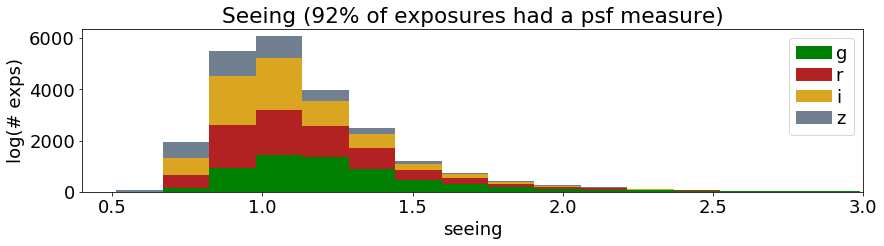

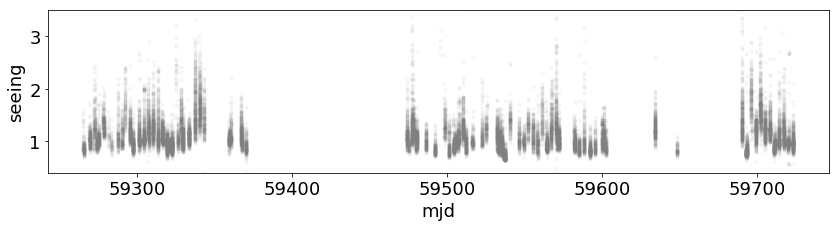

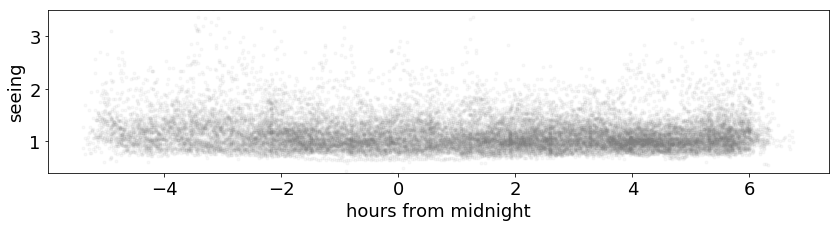

In [12]:
tx = np.where( np.isfinite(qcinv_psf) )[0]
label = str(int(np.round((float(len(tx))/float(len(qcinv_psf)))*100.0,0))) + '% of exposures had a psf measure'

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_psf[gx],qcinv_psf[rx],qcinv_psf[ix],qcinv_psf[zx]], \
         bins=30, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('seeing',fontsize=18)
plt.ylabel('log(# exps)',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.title('Seeing ('+label+')')
plt.xlim([0.4,3])
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_mjd[tx], qcinv_psf[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('mjd',fontsize=18)
plt.ylabel('seeing',fontsize=18)
plt.ylim([0.4,3.5])
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_nhr[tx], qcinv_psf[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('seeing',fontsize=18)
plt.ylim([0.4,3.5])
plt.show()

del tx,label

/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


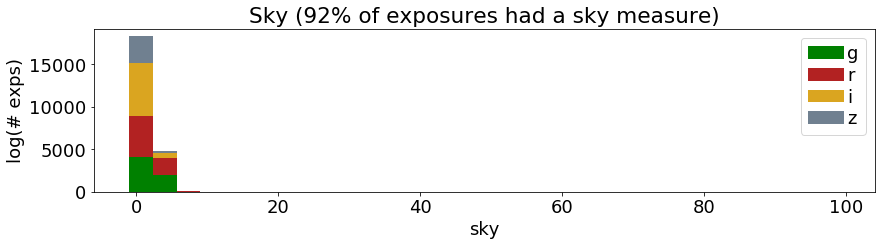

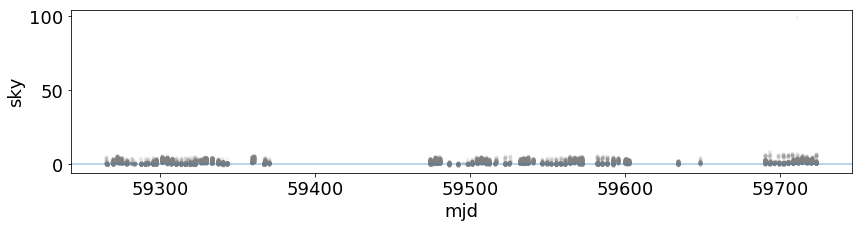

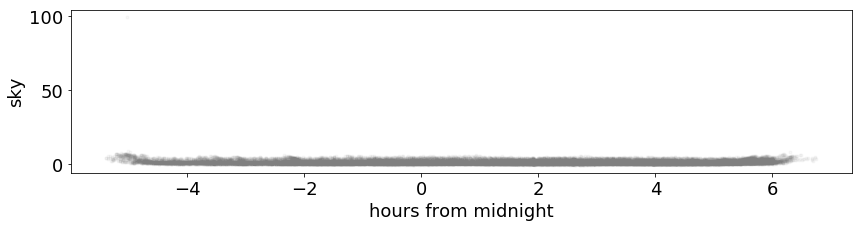

In [13]:
tx = np.where( np.isfinite(qcinv_sky) )[0]
label = str(int(np.round((float(len(tx))/float(len(qcinv_sky)))*100.0,0))) + '% of exposures had a sky measure'

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_sky[gx],qcinv_sky[rx],qcinv_sky[ix],qcinv_sky[zx]], \
         bins=30, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('sky',fontsize=18)
plt.ylabel('log(# exps)',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.title('Sky ('+label+')')
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_mjd[tx], qcinv_sky[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.axhline( 0.0, alpha=0.4 )
plt.xlabel('mjd',fontsize=18)
plt.ylabel('sky',fontsize=18)
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_nhr[tx], qcinv_sky[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('sky',fontsize=18)
plt.show()

del tx,label

No handles with labels found to put in legend.


-6.71 99.0


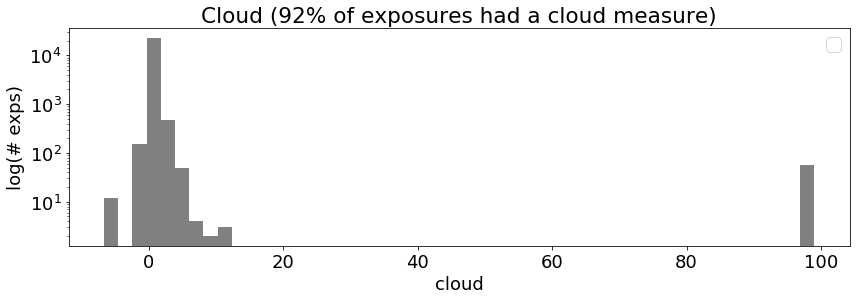

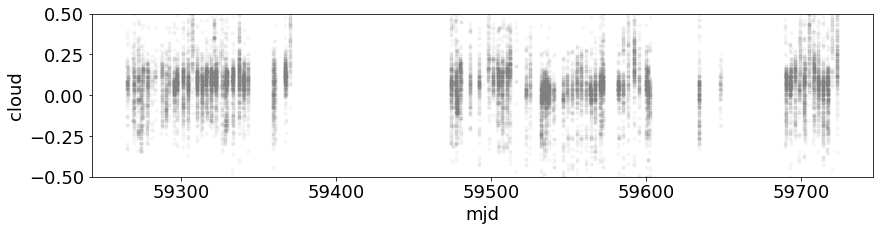

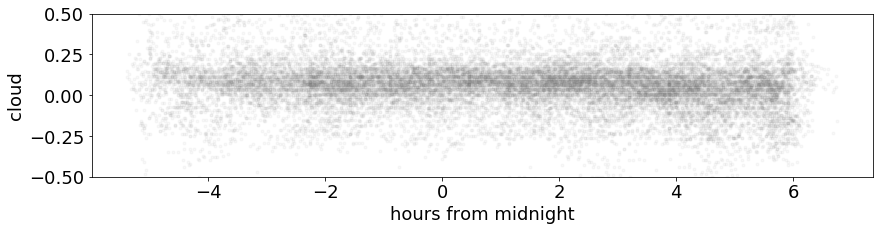

In [14]:
tx = np.where( np.isfinite(qcinv_cloud) )[0]
print(np.min(qcinv_cloud[tx]),np.max(qcinv_cloud[tx]))
label = str(int(np.round((float(len(tx))/float(len(qcinv_cloud)))*100.0,0))) + '% of exposures had a cloud measure'

fig = plt.figure(figsize=(14,4))
plt.rcParams.update({'font.size':18})
# plt.hist( [qcinv_cloud[gx],qcinv_cloud[rx],qcinv_cloud[ix],qcinv_cloud[zx]], \
#          bins=30, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.hist( qcinv_cloud[tx], bins=50, log=True, color='grey' )
plt.xlabel('cloud',fontsize=18)
plt.ylabel('log(# exps)',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.title('Cloud ('+label+')')
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_mjd[tx], qcinv_cloud[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('mjd',fontsize=18)
plt.ylabel('cloud',fontsize=18)
# plt.ylim([-1,4])
plt.ylim([-0.5,0.5])
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_nhr[tx], qcinv_cloud[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('cloud',fontsize=18)
# plt.ylim([-1,4])
plt.ylim([-0.5,0.5])
plt.show()

del tx,label

/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/melissagraham/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


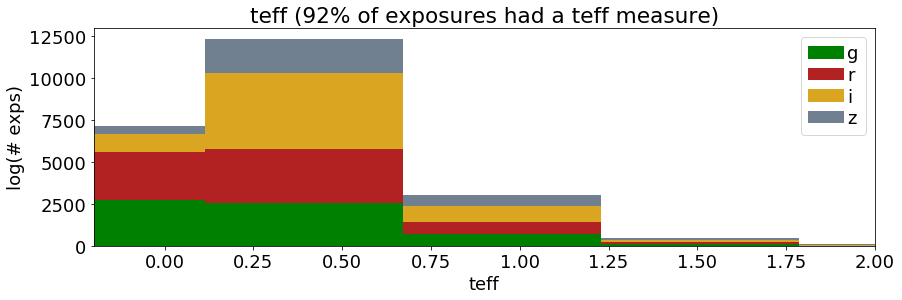

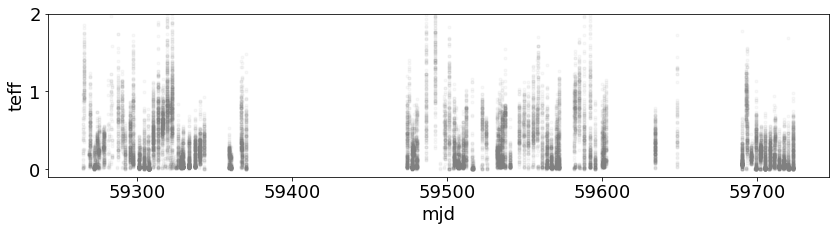

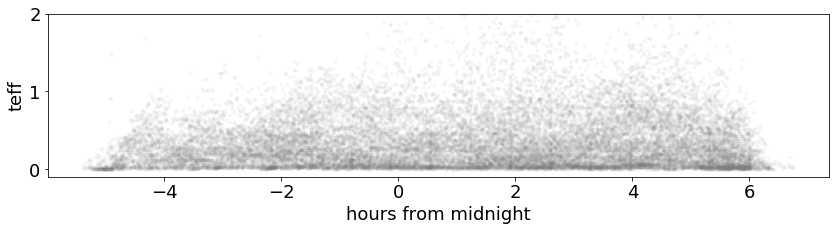

In [15]:
tx = np.where( np.isfinite(qcinv_teff) )[0]
label = str(int(np.round((float(len(tx))/float(len(qcinv_teff)))*100.0,0))) + '% of exposures had a teff measure'

fig = plt.figure(figsize=(14,4))
plt.rcParams.update({'font.size':18})
plt.hist( [qcinv_teff[gx],qcinv_teff[rx],qcinv_teff[ix],qcinv_teff[zx]], \
         bins=40, log=False, stacked='True', color=filt_clrs, label=filt_lbls )
plt.xlabel('teff',fontsize=18)
plt.ylabel('log(# exps)',fontsize=18)
plt.legend(loc='best',handletextpad=0.2,labelspacing=0.2,fontsize=18,numpoints=1,ncol=1)
plt.xlim([-0.2,2])
plt.title('teff ('+label+')')
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_mjd[tx], qcinv_teff[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('mjd',fontsize=18)
plt.ylabel('teff',fontsize=18)
plt.ylim([-0.1,2])
plt.show()

fig = plt.figure(figsize=(14,3))
plt.rcParams.update({'font.size':18})
plt.plot( qcinv_nhr[tx], qcinv_teff[tx], 'o', ms=3, alpha=0.05, color='grey' )
plt.xlabel('hours from midnight',fontsize=18)
plt.ylabel('teff',fontsize=18)
plt.ylim([-0.1,2])
plt.show()

del tx,label